In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install nltk
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Stage-1a: Data Setup***

In [ ]:
import pandas as pd
file_path = 'drive/My Drive/YU-ML-Proj-3/Tweets-modified.csv'
df1 = pd.read_csv(file_path, encoding='latin-1',usecols=[0,1,5,10])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14640 non-null  int64 
 1   airline_sentiment  14640 non-null  object
 2   airline            14640 non-null  object
 3   text               14640 non-null  object
dtypes: int64(1), object(3)
memory usage: 457.6+ KB


In [ ]:
df1.dtypes
#print(df1.columns)

tweet_id              int64
airline_sentiment    object
airline              object
text                 object
dtype: object

In [ ]:
df1.columns=['tweet_id','airline_sentiment', 'airline_type', 'tweet_Original']

In [ ]:
df1.rename(columns={'text ':'tweet_Original'}, inplace=True)
df1.rename(columns={'text ':'tweet_Original'}, inplace=True)

In [ ]:
from random import sample
df1.sample(2, random_state = 42)
#display(df1.head())
display(df1.tail())

,tweet_id,airline_sentiment,airline_type,tweet_Original
14635,569587686496825344,positive,American,@AmericanAir thank you we got on a different f...
14636,569587371693355008,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,569587242672398336,positive,American,@AmericanAir Please bring American Airlines to...
14638,569587188687634433,negative,American,"@AmericanAir you have my money, you change my ..."
14639,569587140490866689,positive,American,@AmericanAir we have 8 ppl so we need 2 know h...


In [ ]:
len(df1)
df1.count()

tweet_id             14640
airline_sentiment    14640
airline_type         14640
tweet_Original       14640
dtype: int64

In [ ]:
df1.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# remove duplicated rows
#df1.drop_duplicates(inplace=True)

In [ ]:
#df1.dropna(inplace=True)  # This will drop rows with NaN values from your DataFrame

In [ ]:
# Identify rows with NaN values
#rows_with_nan = df1[df1.isna().any(axis=1)]

# Display rows with NaN values
#print(rows_with_nan)

In [ ]:
#df1.profile_report()

In [ ]:
df1 = pd.get_dummies(df1, columns=['airline_sentiment'], drop_first=True)
display(df1.head())
display(df1.tail())

,tweet_id,airline_type,tweet_Original,airline_sentiment_positive
0,570301031407624196,Virgin America,@VirginAmerica it's really aggressive to blast...,0
1,570301130888122368,Virgin America,@VirginAmerica plus you've added commercials t...,1
2,570301083672813571,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1
3,570306133677760513,Virgin America,@VirginAmerica What @dhepburn said.,1
4,570300817074462722,Virgin America,@VirginAmerica and it's a really big bad thing...,0


,tweet_id,airline_type,tweet_Original,airline_sentiment_positive
14635,569587686496825344,American,@AmericanAir thank you we got on a different f...,1
14636,569587371693355008,American,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,569587242672398336,American,@AmericanAir Please bring American Airlines to...,1
14638,569587188687634433,American,"@AmericanAir you have my money, you change my ...",0
14639,569587140490866689,American,@AmericanAir we have 8 ppl so we need 2 know h...,1


In [ ]:
df2 = df1
df2 = df2[['airline_sentiment_positive','tweet_Original']]
display(df2.head())
display(df2.tail())

,airline_sentiment_positive,tweet_Original
0,0,@VirginAmerica it's really aggressive to blast...
1,1,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica What @dhepburn said.
4,0,@VirginAmerica and it's a really big bad thing...


,airline_sentiment_positive,tweet_Original
14635,1,@AmericanAir thank you we got on a different f...
14636,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,1,@AmericanAir Please bring American Airlines to...
14638,0,"@AmericanAir you have my money, you change my ..."
14639,1,@AmericanAir we have 8 ppl so we need 2 know h...


***Stage-1b : Pre-processing on the Text data***

In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
# Remove HTTP tags
%time df2['tweet_Processed'] = df2['tweet_Original'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

CPU times: user 201 ms, sys: 3.86 ms, total: 204 ms
Wall time: 210 ms


,airline_sentiment_positive,tweet_Original,tweet_Processed
0,0,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious ente...
1,1,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experienc...
2,1,@VirginAmerica I didn't today... Must mean I n...,I didn t today Must mean I need to take anothe...
3,1,@VirginAmerica What @dhepburn said.,What said
4,0,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it


In [ ]:
#Lower Case
%time df2['tweet_Processed'] = df2['tweet_Processed'].map(lambda x: x.lower())
df2.head()

CPU times: user 6.54 ms, sys: 3.67 ms, total: 10.2 ms
Wall time: 11.6 ms


,airline_sentiment_positive,tweet_Original,tweet_Processed
0,0,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious ente...
1,1,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experienc...
2,1,@VirginAmerica I didn't today... Must mean I n...,i didn t today must mean i need to take anothe...
3,1,@VirginAmerica What @dhepburn said.,what said
4,0,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it


In [ ]:
#Remove punctuations-any character that is not a word character or a whitespace character.
%time df2['tweet_Processed'] = df2['tweet_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

CPU times: user 38 ms, sys: 0 ns, total: 38 ms
Wall time: 41 ms


,airline_sentiment_positive,tweet_Original,tweet_Processed
0,0,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious ente...
1,1,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experienc...
2,1,@VirginAmerica I didn't today... Must mean I n...,i didn t today must mean i need to take anothe...
3,1,@VirginAmerica What @dhepburn said.,what said
4,0,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it


In [ ]:
#Remove unicodes
%time df2['tweet_Processed'] = df2['tweet_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

CPU times: user 42 ms, sys: 0 ns, total: 42 ms
Wall time: 42.8 ms


,airline_sentiment_positive,tweet_Original,tweet_Processed
0,0,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious ente...
1,1,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experienc...
2,1,@VirginAmerica I didn't today... Must mean I n...,i didn t today must mean i need to take anothe...
3,1,@VirginAmerica What @dhepburn said.,what said
4,0,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
%time df2['tweet_Processed'] = df2['tweet_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


CPU times: user 524 ms, sys: 9.91 ms, total: 534 ms
Wall time: 536 ms


,airline_sentiment_positive,tweet_Original,tweet_Processed
0,0,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
1,1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky
2,1,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,1,@VirginAmerica What @dhepburn said.,said
4,0,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [ ]:
# Lemmatize the text
nltk.download('wordnet')
lemmer = WordNetLemmatizer()

%time df2['tweet_Processed'] = df2['tweet_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


CPU times: user 2.39 s, sys: 39.8 ms, total: 2.43 s
Wall time: 2.44 s


,airline_sentiment_positive,tweet_Original,tweet_Processed
0,0,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
1,1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky
2,1,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,1,@VirginAmerica What @dhepburn said.,said
4,0,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [ ]:
#Removing Stop words again after Lemmatize
%time df2['tweet_Processed'] = df2['tweet_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())
display(df2.tail())

CPU times: user 385 ms, sys: 1.18 ms, total: 387 ms
Wall time: 391 ms


,airline_sentiment_positive,tweet_Original,tweet_Processed
0,0,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
1,1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky
2,1,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,1,@VirginAmerica What @dhepburn said.,said
4,0,@VirginAmerica and it's a really big bad thing...,really big bad thing


,airline_sentiment_positive,tweet_Original,tweet_Processed
14635,1,@AmericanAir thank you we got on a different f...,thank got different flight chicago
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,leaving 20 minute late flight warning communic...
14637,1,@AmericanAir Please bring American Airlines to...,please bring american airline blackberry10
14638,0,"@AmericanAir you have my money, you change my ...",money change flight answer phone suggestion ma...
14639,1,@AmericanAir we have 8 ppl so we need 2 know h...,8 ppl need 2 know many seat next flight plz pu...


***Stage 2 : Embedding on the processed text data***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

***2a:EDA***

In [ ]:
#funtion to get 'top N' or 'bottom N' words
def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [ ]:
#10 most common and 10 most rare words
common_words = get_n_words(df2['tweet_Processed'], "top", 15)
rare_words = get_n_words(df2['tweet_Processed'], "bottom", 15)

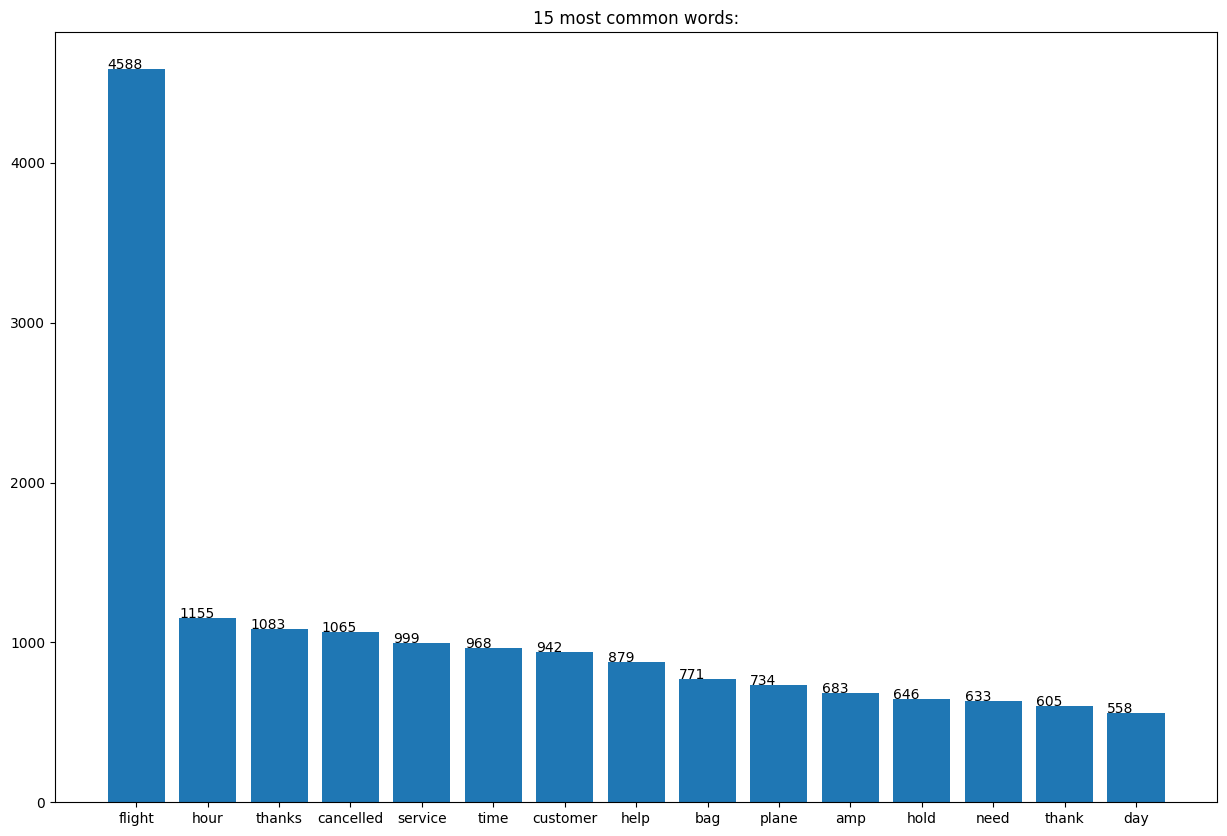

In [ ]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

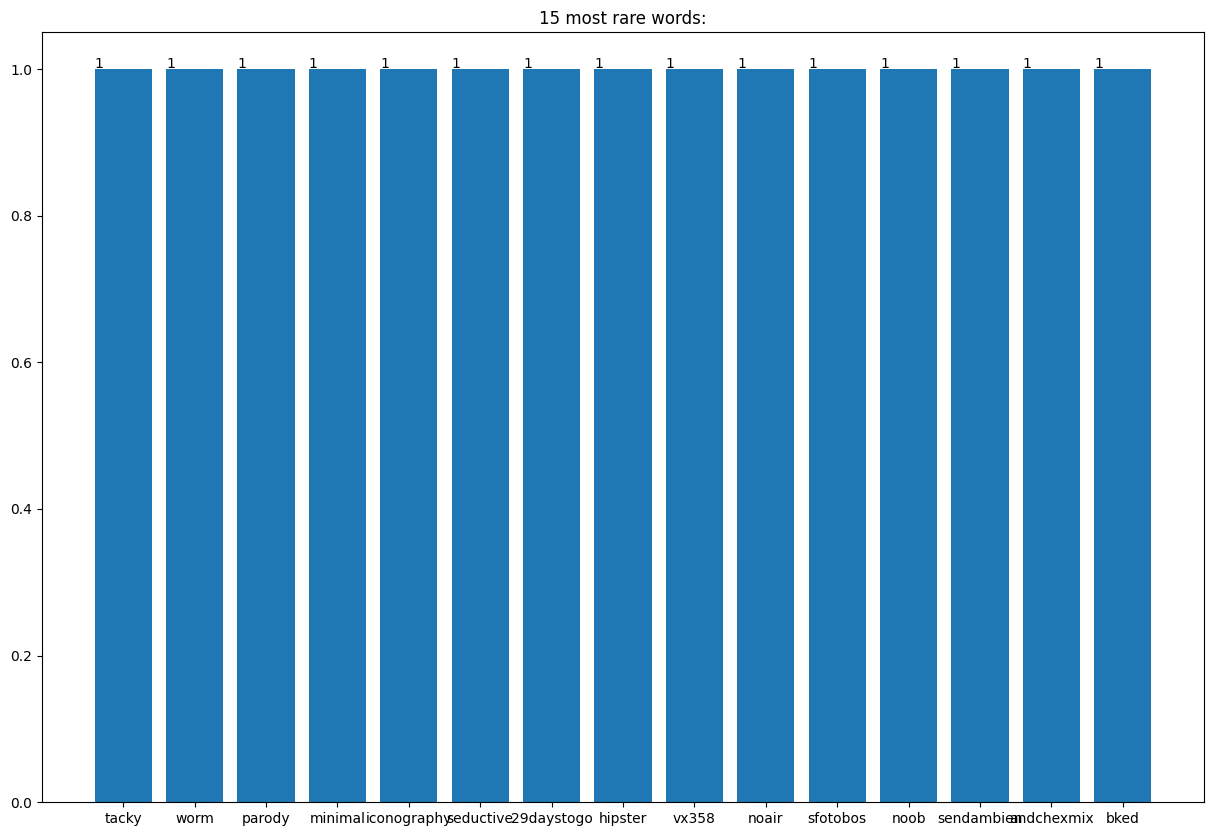

In [ ]:
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [ ]:
# BOW-TF Embedding
from sklearn.feature_extraction.text import CountVectorizer

no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=(1, 3))

tpl_tf = tf_vectorizer.fit_transform(df2['tweet_Processed'])
display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names_out())
display(df_tf.head())

'Bow-TF :'

(14640, 100)

,agent,airline,airport,amp,another,back,bag,baggage,call,cancelled,...,united,wait,waiting,want,way,weather,work,worst,would,yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df2, df_tf], axis = 1)
df_tf_m.drop(columns=['tweet_Original', 'tweet_Processed'], inplace = True)
print(df_tf_m.shape)
display(df_tf_m.head())
display(df_tf_m.tail())

(14640, 101)


,airline_sentiment_positive,agent,airline,airport,amp,another,back,bag,baggage,call,...,united,wait,waiting,want,way,weather,work,worst,would,yes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,airline_sentiment_positive,agent,airline,airport,amp,another,back,bag,baggage,call,...,united,wait,waiting,want,way,weather,work,worst,would,yes
14635,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14639,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Identify rows with NaN values
#rows_with_nan = df_tf_m[df_tf_m.isna().any(axis=1)]
# Display rows with NaN values
#print(rows_with_nan)

In [ ]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=(1,3))

%time tpl_tfidf = tfidf_vectorizer.fit_transform(df2['tweet_Processed'])
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df2.index)
display(df_tfidf.head())

CPU times: user 533 ms, sys: 34.7 ms, total: 568 ms
Wall time: 577 ms


'Bow-TF:IDF :'

(14640, 61)

,agent,airline,airport,amp,back,bag,call,cancelled,cancelled flightled,change,...,ticket,time,today,tomorrow,trying,wait,waiting,way,weather,would
0,0.0,0.0,0.0,0.648372,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.736137,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df2, df_tfidf], axis = 1)
df_tfidf_m.drop(columns=['tweet_Original', 'tweet_Processed'], inplace = True)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())
display(df_tfidf_m.tail())

(14640, 62)


,airline_sentiment_positive,agent,airline,airport,amp,back,bag,call,cancelled,cancelled flightled,...,ticket,time,today,tomorrow,trying,wait,waiting,way,weather,would
0,0,0.0,0.0,0.0,0.648372,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.736137,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,airline_sentiment_positive,agent,airline,airport,amp,back,bag,call,cancelled,cancelled flightled,...,ticket,time,today,tomorrow,trying,wait,waiting,way,weather,would
14635,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,1,0.0,0.707557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14639,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Stage-3: Model Building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [ ]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics
def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [ ]:
#function to prepare different Classification models
from imblearn.over_sampling import SMOTE
smote = SMOTE()
def model_dvt(df):
    Y = df['airline_sentiment_positive']
    X = df.drop('airline_sentiment_positive', axis = 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Before Applying SMOTE")
    print("Train Data Dimensions : ", X_train.shape, Y_train.shape)
    print("Test Data Dimensions : ", X_test.shape)

    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
    print("After Applying SMOTE")
    print("Train Data Dimensions : ", X_train_resampled.shape, Y_train_resampled.shape)
    print("Test Data Dimensions : ", X_test.shape, Y_test.shape)

    print("\n", 'Random Forest Classifier')
    clf_RF = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf_RF.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_RF.predict(X_test)
    probs = clf_RF.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'AdaBoost Classifier')
    clf_AdB = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf_AdB.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_AdB.predict(X_test)
    probs = clf_AdB.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Grdient Boosting Classifier')
    clf_GB = GradientBoostingClassifier(n_estimators=200, max_depth=1, random_state=21, learning_rate=1.5)
    %time clf_GB.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_GB.predict(X_test)
    probs = clf_GB.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Naive Bayes Classifier')
    #clf = MultinomialNB(alpha = 1.0)
    clf_NB = GaussianNB()
    %time clf_NB.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_NB.predict(X_test)
    probs = clf_NB.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Logistic Regression Classifier')
    clf_LR = LogisticRegression(random_state=21)
    %time clf_LR.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_LR.predict(X_test)
    probs = clf_LR.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Support Vector Machine Classifier')
    clf_SVM = SVC(probability=True, random_state=21)
    %time clf_SVM.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_SVM.predict(X_test)
    probs = clf_SVM.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'K-Nearest Neighbors Classifier')
    clf_KNN = KNeighborsClassifier()
    %time clf_KNN.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_KNN.predict(X_test)
    probs = clf_KNN.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Decision Tree Classifier')
    clf_DT = DecisionTreeClassifier(random_state=21)
    %time clf_DT.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_DT.predict(X_test)
    probs = clf_DT.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\nLinear Discriminant Analysis")
    clf_LDA = LinearDiscriminantAnalysis()
    %time clf_LDA.fit(X_train_resampled, Y_train_resampled)
    Y_pred = clf_LDA.predict(X_test)
    probs = clf_LDA.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

In [ ]:
#df_tf_m.dropna(inplace=True)

Models on Term Frequency - Bag of Words data
Before Applying SMOTE
Train Data Dimensions :  (12444, 100) (12444,)
Test Data Dimensions :  (2196, 100)
After Applying SMOTE
Train Data Dimensions :  (15598, 100) (15598,)
Test Data Dimensions :  (2196, 100) (2196,)

 Random Forest Classifier
CPU times: user 3.97 s, sys: 10.8 ms, total: 3.98 s
Wall time: 3.99 s

 Confusion Matrix


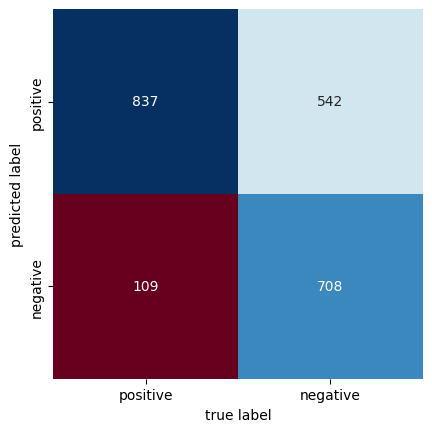


 Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1379
           1       0.57      0.87      0.69       817

    accuracy                           0.70      2196
   macro avg       0.73      0.74      0.70      2196
weighted avg       0.77      0.70      0.71      2196

Overall Accuracy :  70.36
Precision Score :  56.64
Recall Score :  86.66
AUC :  82.21 



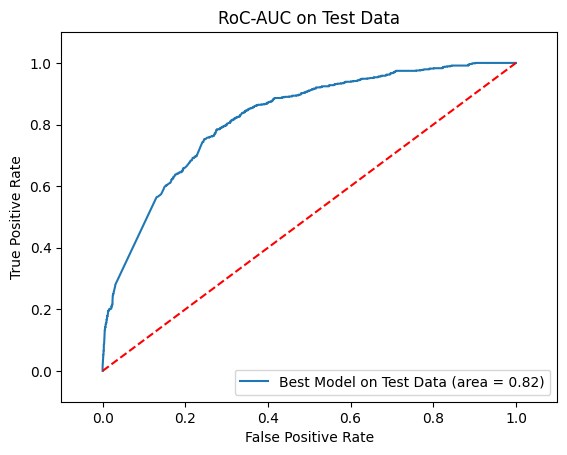

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: user 3.33 s, sys: 11.8 ms, total: 3.34 s
Wall time: 3.35 s

 Confusion Matrix


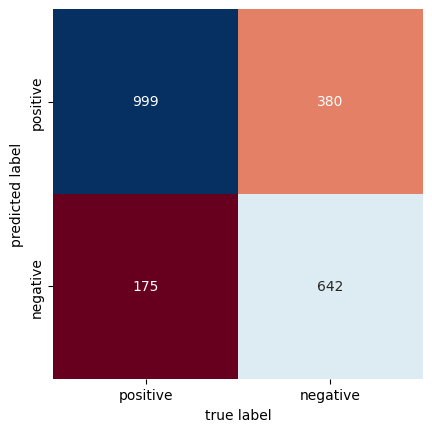


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1379
           1       0.63      0.79      0.70       817

    accuracy                           0.75      2196
   macro avg       0.74      0.76      0.74      2196
weighted avg       0.77      0.75      0.75      2196

Overall Accuracy :  74.73
Precision Score :  62.82
Recall Score :  78.58
AUC :  83.14 



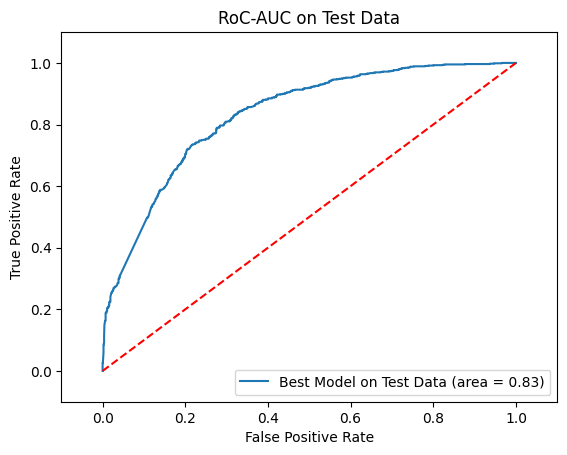

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: user 2.31 s, sys: 2.89 ms, total: 2.32 s
Wall time: 2.36 s

 Confusion Matrix


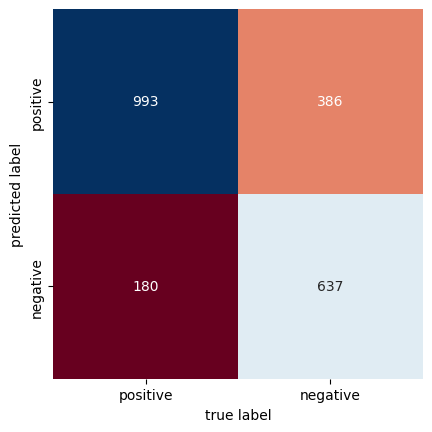


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1379
           1       0.62      0.78      0.69       817

    accuracy                           0.74      2196
   macro avg       0.73      0.75      0.74      2196
weighted avg       0.76      0.74      0.75      2196

Overall Accuracy :  74.23
Precision Score :  62.27
Recall Score :  77.97
AUC :  82.71 



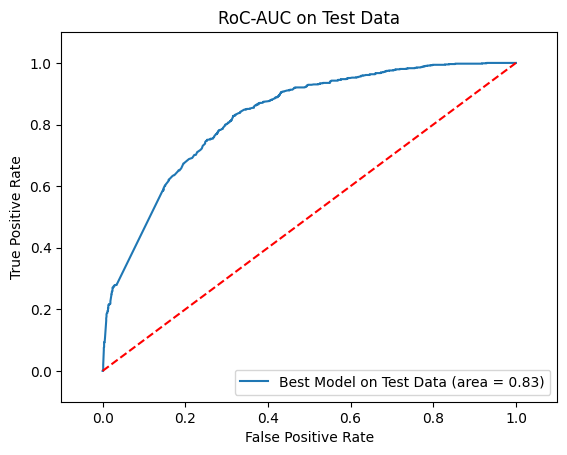

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: user 42.5 ms, sys: 0 ns, total: 42.5 ms
Wall time: 50.5 ms

 Confusion Matrix


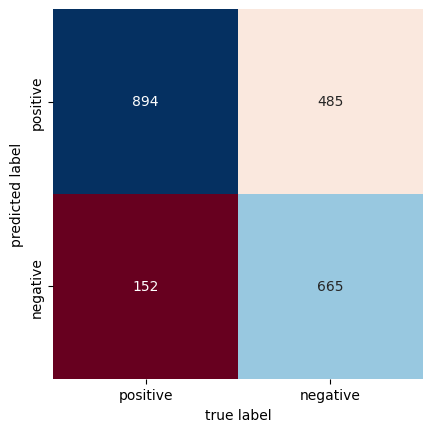


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1379
           1       0.58      0.81      0.68       817

    accuracy                           0.71      2196
   macro avg       0.72      0.73      0.71      2196
weighted avg       0.75      0.71      0.71      2196

Overall Accuracy :  70.99
Precision Score :  57.83
Recall Score :  81.4
AUC :  78.71 



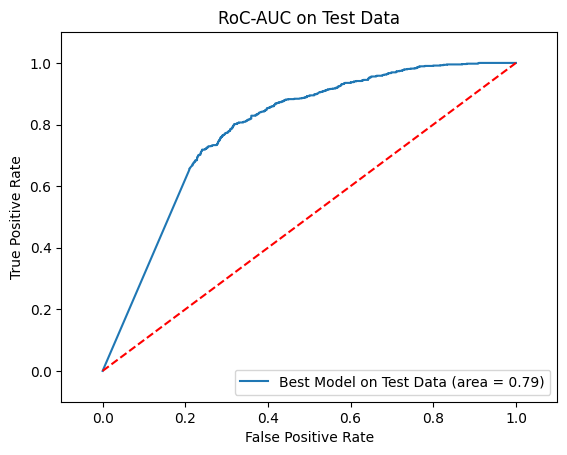

--------------------------------------------------------------------------

 Logistic Regression Classifier
CPU times: user 240 ms, sys: 109 ms, total: 349 ms
Wall time: 338 ms

 Confusion Matrix


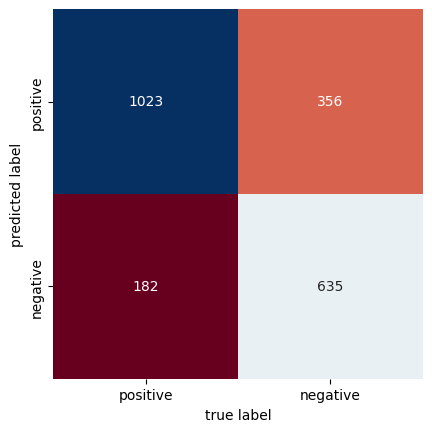


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1379
           1       0.64      0.78      0.70       817

    accuracy                           0.76      2196
   macro avg       0.74      0.76      0.75      2196
weighted avg       0.77      0.76      0.76      2196

Overall Accuracy :  75.5
Precision Score :  64.08
Recall Score :  77.72
AUC :  83.4 



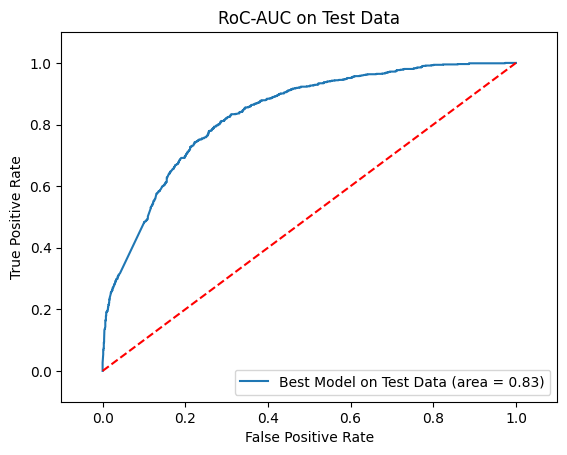

--------------------------------------------------------------------------

 Support Vector Machine Classifier
CPU times: user 2min 4s, sys: 873 ms, total: 2min 4s
Wall time: 2min 7s

 Confusion Matrix


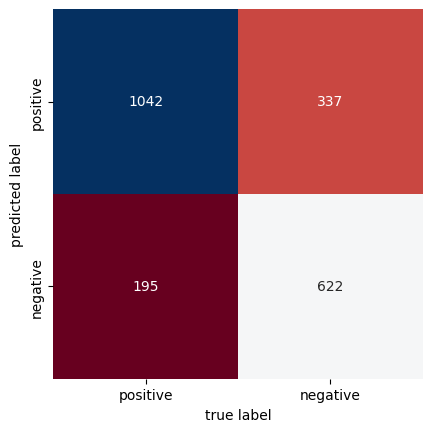


 Classification Report 

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1379
           1       0.65      0.76      0.70       817

    accuracy                           0.76      2196
   macro avg       0.75      0.76      0.75      2196
weighted avg       0.77      0.76      0.76      2196

Overall Accuracy :  75.77
Precision Score :  64.86
Recall Score :  76.13
AUC :  82.52 



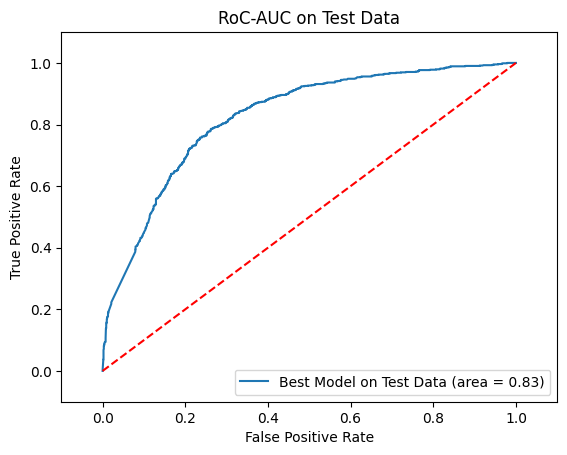

--------------------------------------------------------------------------

 K-Nearest Neighbors Classifier
CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 11.1 ms

 Confusion Matrix


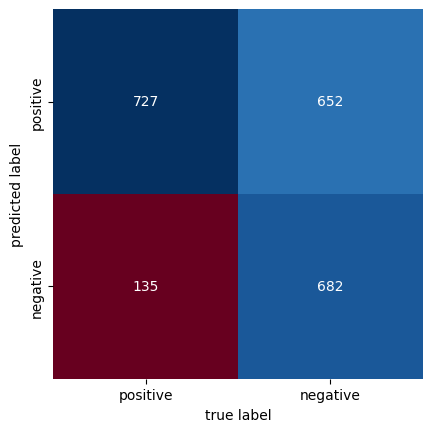


 Classification Report 

              precision    recall  f1-score   support

           0       0.84      0.53      0.65      1379
           1       0.51      0.83      0.63       817

    accuracy                           0.64      2196
   macro avg       0.68      0.68      0.64      2196
weighted avg       0.72      0.64      0.64      2196

Overall Accuracy :  64.16
Precision Score :  51.12
Recall Score :  83.48
AUC :  76.1 



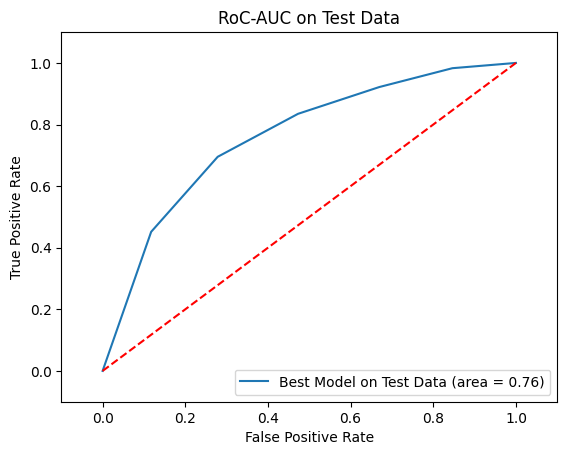

--------------------------------------------------------------------------

 Decision Tree Classifier
CPU times: user 259 ms, sys: 0 ns, total: 259 ms
Wall time: 259 ms

 Confusion Matrix


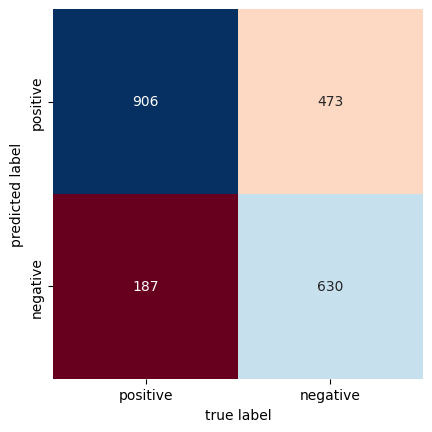


 Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.66      0.73      1379
           1       0.57      0.77      0.66       817

    accuracy                           0.70      2196
   macro avg       0.70      0.71      0.69      2196
weighted avg       0.73      0.70      0.70      2196

Overall Accuracy :  69.95
Precision Score :  57.12
Recall Score :  77.11
AUC :  72.67 



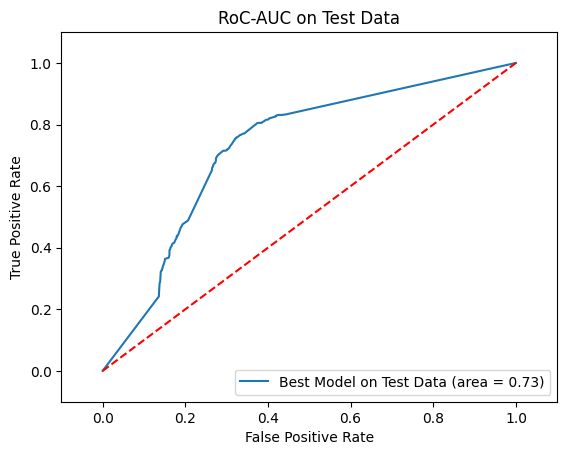

--------------------------------------------------------------------------

Linear Discriminant Analysis
CPU times: user 364 ms, sys: 18.8 ms, total: 383 ms
Wall time: 256 ms

 Confusion Matrix


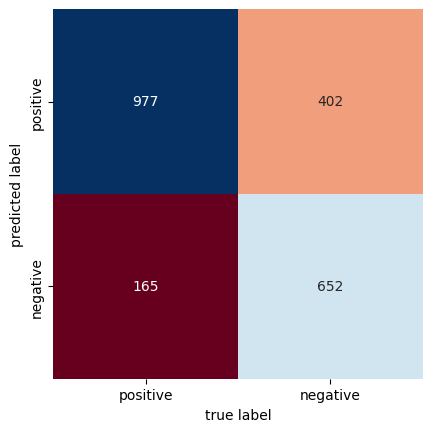


 Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1379
           1       0.62      0.80      0.70       817

    accuracy                           0.74      2196
   macro avg       0.74      0.75      0.74      2196
weighted avg       0.77      0.74      0.75      2196

Overall Accuracy :  74.18
Precision Score :  61.86
Recall Score :  79.8
AUC :  82.79 



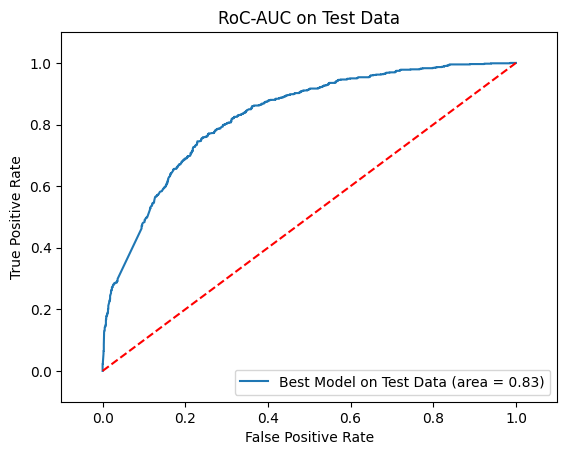

--------------------------------------------------------------------------
CPU times: user 2min 27s, sys: 3.72 s, total: 2min 31s
Wall time: 2min 32s


In [ ]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(df_tf_m)

***4. Hyper-parameter Tuning  models that used TF-BoW embedding data***

**4.1. Grid-Search hyperparameter tuning on AdaBoost Classifier**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
from sklearn.model_selection import GridSearchCV
Y = df_tf_m['airline_sentiment_positive']
X = df_tf_m.drop('airline_sentiment_positive', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

Train Data Dimensions :  (12444, 100)
Test Data Dimensions :  (2196, 100)


In [ ]:
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [100,200,300],
               'learning_rate' : [1.0, 0.1, 0.05]}

ABC = AdaBoostClassifier()
#Building a 10 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ABC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

#Fitting the grid to the training data
%time grid_object.fit(X_train_resampled, Y_train_resampled)

CPU times: user 5.94 s, sys: 917 ms, total: 6.86 s
Wall time: 4min 39s


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.05],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Best Parameters :  {'learning_rate': 1.0, 'n_estimators': 100}
Best_ROC-AUC :  84.78
Best model :  AdaBoostClassifier(n_estimators=100)

 Confusion Matrix


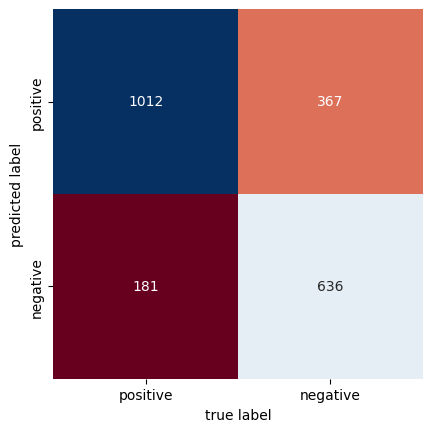


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1379
           1       0.63      0.78      0.70       817

    accuracy                           0.75      2196
   macro avg       0.74      0.76      0.74      2196
weighted avg       0.77      0.75      0.75      2196

Overall Accuracy :  75.05
Precision Score :  63.41
Recall Score :  77.85
AUC :  83.31 



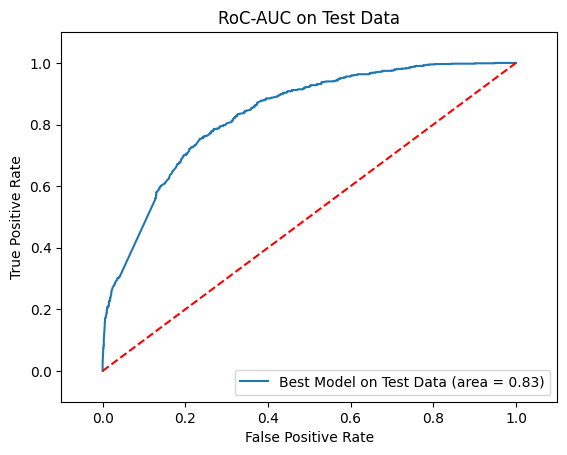

--------------------------------------------------------------------------
CPU times: user 3.79 s, sys: 14.6 ms, total: 3.81 s
Wall time: 3.84 s
Cross Validation Accuracy :  73.86
Cross Validation Accuracy in every fold :  [70.   76.36 75.91 71.36 72.27 75.   75.8  73.97 77.17 70.78]


In [ ]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid-Search hyperparameter tuning on Random Forest Classifier***

In [ ]:
grid_params = {'n_estimators' : [100,200,300,400,500],
               'max_depth' : [10, 7, 5, 3],
               'criterion' : ['entropy', 'gini']}

RFC = RandomForestClassifier()
grid_object = GridSearchCV(estimator = RFC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

%time grid_object.fit(X_train_resampled, Y_train_resampled)

CPU times: user 11.2 s, sys: 1.24 s, total: 12.5 s
Wall time: 11min 28s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 7, 5, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

Best_ROC-AUC :  83.17
Best model :  RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=400)

 Confusion Matrix


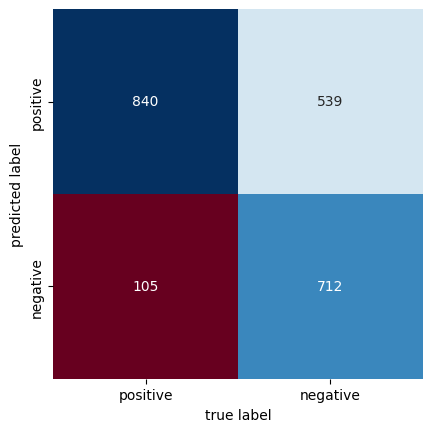


 Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.61      0.72      1379
           1       0.57      0.87      0.69       817

    accuracy                           0.71      2196
   macro avg       0.73      0.74      0.71      2196
weighted avg       0.77      0.71      0.71      2196

Overall Accuracy :  70.67
Precision Score :  56.91
Recall Score :  87.15
AUC :  82.24 



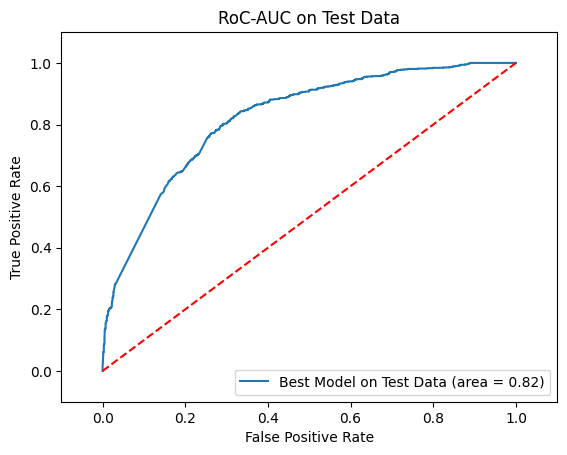

--------------------------------------------------------------------------
CPU times: user 10.7 s, sys: 39.7 ms, total: 10.7 s
Wall time: 10.8 s
Cross Validation Accuracy :  69.99
Cross Validation Accuracy in every fold :  [69.09 71.82 65.45 68.64 71.82 66.82 71.23 73.52 68.95 72.6 ]


In [ ]:
# print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid-Search hyperparameter tuning on GradientBoost***

In [ ]:
grid_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

#Create a Gradient Boosting Classifier object
GBC = GradientBoostingClassifier()

# Build a 10-fold CV GridSearchCV object
grid_object = GridSearchCV(estimator=GBC, param_grid=grid_params, scoring='roc_auc', cv=10, n_jobs=-1)

# Fit the grid to the training data
%time grid_object.fit(X_train_resampled, Y_train_resampled)

CPU times: user 28.9 s, sys: 2.97 s, total: 31.9 s
Wall time: 29min 53s


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best ROC-AUC: 85.5

 Confusion Matrix


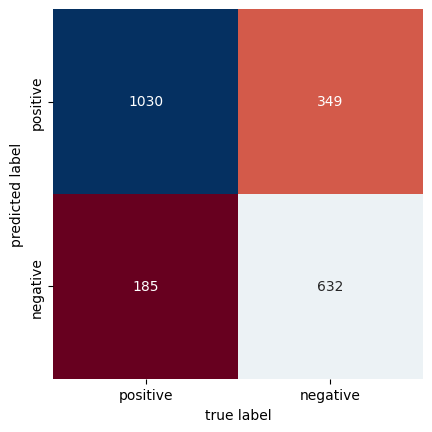


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.75      0.79      1379
           1       0.64      0.77      0.70       817

    accuracy                           0.76      2196
   macro avg       0.75      0.76      0.75      2196
weighted avg       0.77      0.76      0.76      2196

Overall Accuracy :  75.68
Precision Score :  64.42
Recall Score :  77.36
AUC :  83.67 



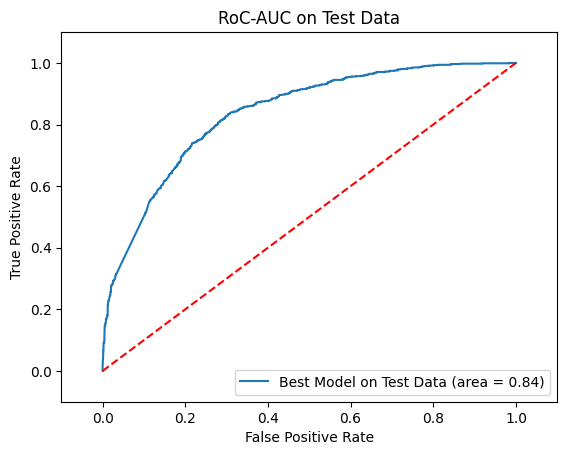

--------------------------------------------------------------------------
CPU times: user 18.6 s, sys: 17 ms, total: 18.6 s
Wall time: 18.8 s
Cross Validation Accuracy :  73.59
Cross Validation Accuracy in every fold :  [69.55 75.91 74.55 66.82 72.73 78.64 77.63 73.52 73.52 73.06]


In [ ]:
# Extract the best parameters and score
print("Best Parameters:", grid_object.best_params_)
print("Best ROC-AUC:", round(grid_object.best_score_ * 100, 2))

# Apply the tuned parameters back to the model
best_model = grid_object.best_estimator_
Y_pred = best_model.predict(X_test)
probs = best_model.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid Search Hyperparameter tunning on Logisitc Regression***

In [ ]:
# Creating a grid of hyperparameters
grid_params_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Instantiate Logistic Regression classifier
log_reg = LogisticRegression()

# Building a 10-fold CV GridSearchCV object
grid_object_LR = GridSearchCV(estimator=log_reg, param_grid=grid_params_LR, scoring='roc_auc', cv=10, n_jobs=-1)

# Fitting the grid to the training data
%time grid_object_LR.fit(X_train_resampled, Y_train_resampled)

CPU times: user 562 ms, sys: 153 ms, total: 715 ms
Wall time: 11 s


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

Best Parameters :  {'C': 10, 'penalty': 'l2'}
Best_ROC-AUC :  85.18
Best model :  LogisticRegression(C=10)

 Confusion Matrix


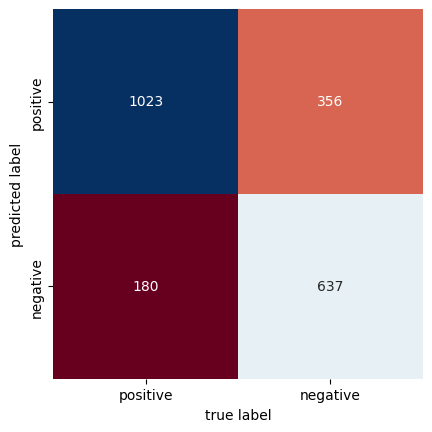


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1379
           1       0.64      0.78      0.70       817

    accuracy                           0.76      2196
   macro avg       0.75      0.76      0.75      2196
weighted avg       0.77      0.76      0.76      2196

Overall Accuracy :  75.59
Precision Score :  64.15
Recall Score :  77.97
AUC :  83.35 



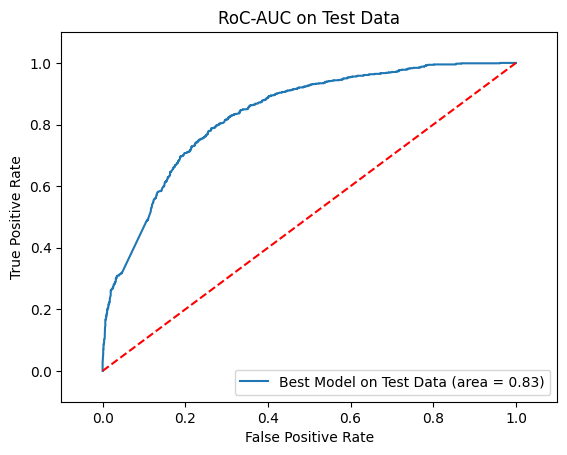

--------------------------------------------------------------------------
CPU times: user 559 ms, sys: 341 ms, total: 900 ms
Wall time: 492 ms
Cross Validation Accuracy :  74.09
Cross Validation Accuracy in every fold :  [71.36 79.55 75.   70.91 72.27 76.82 73.97 73.06 76.71 71.23]


In [ ]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object_LR.best_params_)
print("Best_ROC-AUC : ", round(grid_object_LR.best_score_ * 100, 2))
print("Best model : ", grid_object_LR.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object_LR.best_estimator_.predict(X_test)
probs = grid_object_LR.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object_LR.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid-Search hyperparameter tuning on Naive Bayes***

In [ ]:
# Creating a grid of hyperparameters
grid_params_NB = {}

# Instantiate Gaussian Naive Bayes classifier
NB = GaussianNB()

# Building a 10-fold CV GridSearchCV object
grid_object_NB = GridSearchCV(estimator=NB, param_grid=grid_params_NB, scoring='roc_auc', cv=10, n_jobs=-1)

# Fitting the grid to the training data
%time grid_object_NB.fit(X_train_resampled, Y_train_resampled)

CPU times: user 80 ms, sys: 11.9 ms, total: 92 ms
Wall time: 761 ms


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='roc_auc')

Best Parameters :  {}
Best_ROC-AUC :  81.36
Best model :  GaussianNB()

 Confusion Matrix


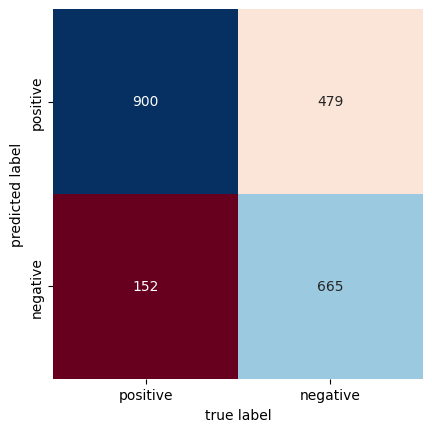


 Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      1379
           1       0.58      0.81      0.68       817

    accuracy                           0.71      2196
   macro avg       0.72      0.73      0.71      2196
weighted avg       0.75      0.71      0.72      2196

Overall Accuracy :  71.27
Precision Score :  58.13
Recall Score :  81.4
AUC :  78.84 



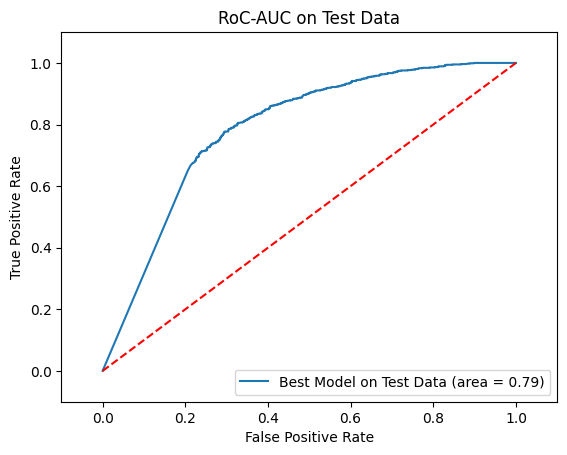

--------------------------------------------------------------------------
CPU times: user 111 ms, sys: 0 ns, total: 111 ms
Wall time: 112 ms
Cross Validation Accuracy :  66.9
Cross Validation Accuracy in every fold :  [66.82 70.45 67.73 59.09 68.64 65.   69.41 68.49 67.58 65.75]


In [ ]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object_NB.best_params_)
print("Best_ROC-AUC : ", round(grid_object_NB.best_score_ * 100, 2))
print("Best model : ", grid_object_NB.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object_NB.best_estimator_.predict(X_test)
probs = grid_object_NB.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object_NB.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid-Search Hyperparameter Tunning on Support Vector Machine***

In [45]:
# Creating a grid of hyperparameters
grid_params_SVM = {'C': [10], 'gamma': [1], 'kernel': ['rbf']}

# Instantiate Support Vector Machine classifier
svm = SVC(probability=True)

# Building a 10-fold CV GridSearchCV object
grid_object_SVM = GridSearchCV(estimator=svm, param_grid=grid_params_SVM, scoring='roc_auc', cv=10, n_jobs=-1)

# Fitting the grid to the training data
%time grid_object_SVM.fit(X_train_resampled, Y_train_resampled)

CPU times: user 5min 52s, sys: 5.91 s, total: 5min 58s
Wall time: 46min 7s


GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [10], 'gamma': [1], 'kernel': ['rbf']},
             scoring='roc_auc')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
# Instantiate Support Vector Machine classifier with optimized hyperparameters
svm = SVC(C=10, gamma=0.01, kernel='rbf')

def SVM_dvt(X_train_resampled, Y_train_resampled):
  print("\n", 'Support Vector Machine Classifier')
  clf_SVM = SVC(probability=True, C=10, gamma=0.01, kernel='rbf',random_state=21)
  %time clf_SVM.fit(X_train_resampled, Y_train_resampled)
  Y_pred = clf_SVM.predict(X_test)
  probs = clf_SVM.predict_proba(X_test)
  clf_report(Y_test, Y_pred, probs)

Best Parameters :  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best_ROC-AUC :  80.18
Best model :  SVC(C=10, gamma=1, probability=True)

 Confusion Matrix


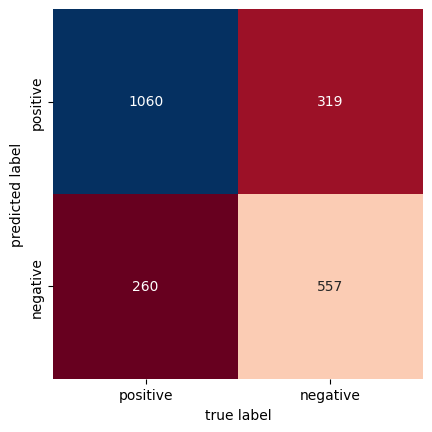


 Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1379
           1       0.64      0.68      0.66       817

    accuracy                           0.74      2196
   macro avg       0.72      0.73      0.72      2196
weighted avg       0.74      0.74      0.74      2196

Overall Accuracy :  73.63
Precision Score :  63.58
Recall Score :  68.18
AUC :  77.25 



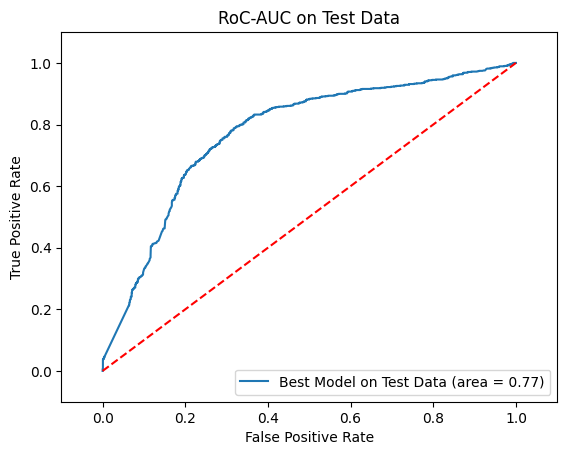

--------------------------------------------------------------------------
CPU times: user 22.9 s, sys: 25.1 ms, total: 22.9 s
Wall time: 23.3 s
Cross Validation Accuracy :  71.32
Cross Validation Accuracy in every fold :  [67.27 70.45 69.55 64.55 68.64 74.55 73.52 73.97 74.89 75.8 ]


In [46]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object_SVM.best_params_)
print("Best_ROC-AUC : ", round(grid_object_SVM.best_score_ * 100, 2))
print("Best model : ", grid_object_SVM.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object_SVM.best_estimator_.predict(X_test)
probs = grid_object_SVM.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object_SVM.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid-Seach Hyperparameter Tunning on K-Nearest Neighbour***

In [ ]:
# Creating a grid of hyperparameters
grid_params_KNN = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}

# Instantiate K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Building a 10-fold CV GridSearchCV object
grid_object_KNN = GridSearchCV(estimator=knn, param_grid=grid_params_KNN, scoring='accuracy', cv=10, n_jobs=-1)

# Fitting the grid to the training data
grid_object_KNN.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Best Parameters :  {'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'distance'}
Best_ROC-AUC :  71.45
Best model :  KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, weights='distance')

 Confusion Matrix


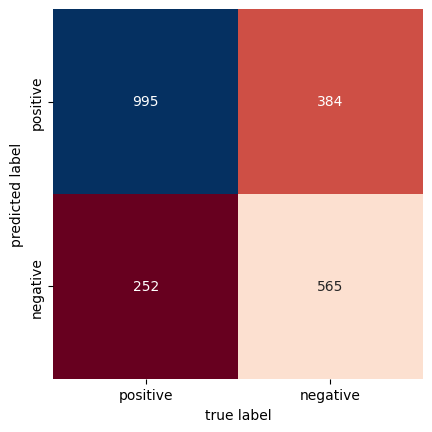


 Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1379
           1       0.60      0.69      0.64       817

    accuracy                           0.71      2196
   macro avg       0.70      0.71      0.70      2196
weighted avg       0.72      0.71      0.71      2196

Overall Accuracy :  71.04
Precision Score :  59.54
Recall Score :  69.16
AUC :  77.78 



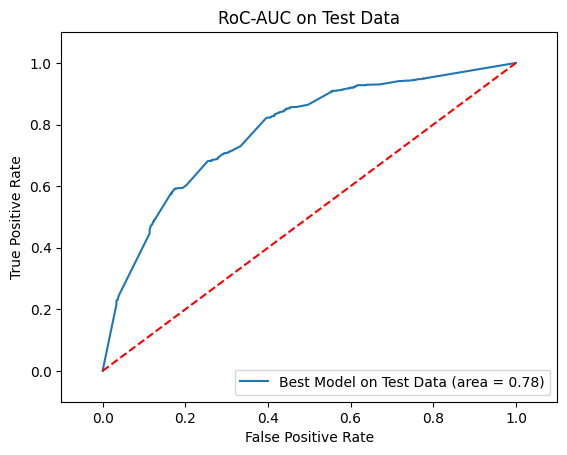

--------------------------------------------------------------------------
CPU times: user 1.49 s, sys: 0 ns, total: 1.49 s
Wall time: 1.54 s
Cross Validation Accuracy :  66.4
Cross Validation Accuracy in every fold :  [66.36 66.82 63.64 59.55 62.27 68.64 74.43 68.04 65.3  68.95]


In [ ]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object_KNN.best_params_)
print("Best_ROC-AUC : ", round(grid_object_KNN.best_score_ * 100, 2))
print("Best model : ", grid_object_KNN.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object_KNN.best_estimator_.predict(X_test)
probs = grid_object_KNN.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object_KNN.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid-Search Hyperprameter Tunning on Decision Tree***

In [ ]:
# Creating a grid of hyperparameters
grid_params_DT = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}

# Instantiate Decision Tree classifier
dt = DecisionTreeClassifier()

# Building a 10-fold CV GridSearchCV object
grid_object_DT = GridSearchCV(estimator=dt, param_grid=grid_params_DT, scoring='accuracy', cv=10, n_jobs=-1)

# Fitting the grid to the training data
grid_object_DT.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best Parameters :  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Best_ROC-AUC :  75.18
Best model :  DecisionTreeClassifier(min_samples_split=10)

 Confusion Matrix


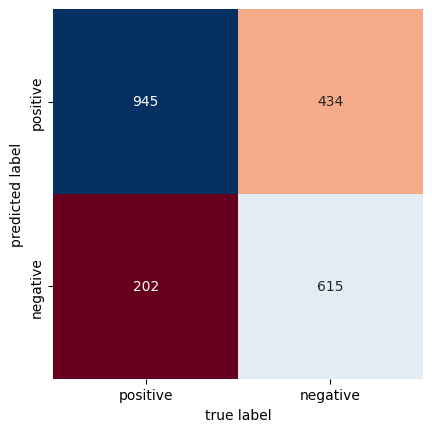


 Classification Report 

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1379
           1       0.59      0.75      0.66       817

    accuracy                           0.71      2196
   macro avg       0.71      0.72      0.70      2196
weighted avg       0.74      0.71      0.72      2196

Overall Accuracy :  71.04
Precision Score :  58.63
Recall Score :  75.28
AUC :  75.5 



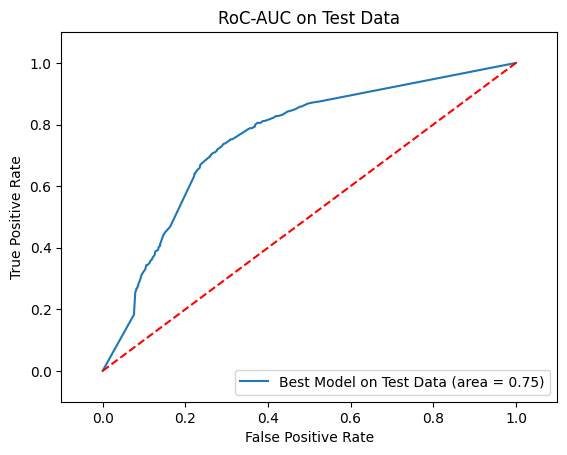

--------------------------------------------------------------------------
CPU times: user 304 ms, sys: 1.62 ms, total: 306 ms
Wall time: 309 ms
Cross Validation Accuracy :  70.13
Cross Validation Accuracy in every fold :  [68.18 74.55 68.18 64.55 68.64 70.45 74.43 74.43 67.58 70.32]


In [ ]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object_DT.best_params_)
print("Best_ROC-AUC : ", round(grid_object_DT.best_score_ * 100, 2))
print("Best model : ", grid_object_DT.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object_DT.best_estimator_.predict(X_test)
probs = grid_object_DT.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object_DT.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

***Grid-Search Hyperparameter Tunning on Linear Discrimnant Analysis***

In [ ]:
# Creating a grid of hyperparameters
grid_params_LDA = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto']}

# Instantiate Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()

# Building a 10-fold CV GridSearchCV object
grid_object_LDA = GridSearchCV(estimator=lda, param_grid=grid_params_LDA, scoring='accuracy', cv=10, n_jobs=-1)

# Fitting the grid to the training data
grid_object_LDA.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': [None, 'auto'],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

Best Parameters :  {'shrinkage': None, 'solver': 'svd'}
Best_ROC-AUC :  77.43
Best model :  LinearDiscriminantAnalysis()

 Confusion Matrix


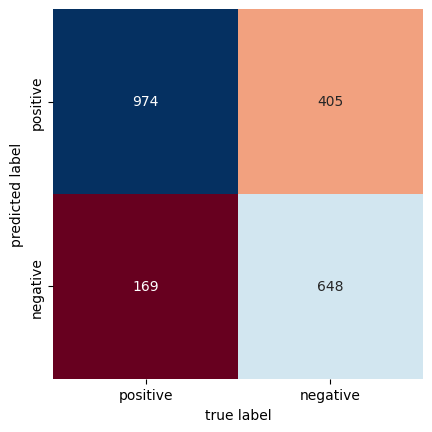


 Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1379
           1       0.62      0.79      0.69       817

    accuracy                           0.74      2196
   macro avg       0.73      0.75      0.73      2196
weighted avg       0.76      0.74      0.74      2196

Overall Accuracy :  73.86
Precision Score :  61.54
Recall Score :  79.31
AUC :  82.86 



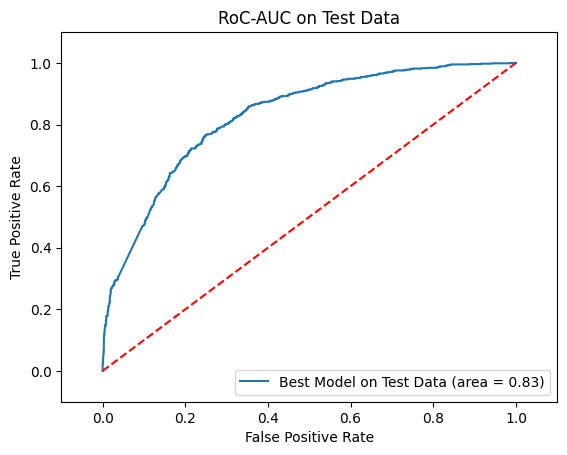

--------------------------------------------------------------------------
CPU times: user 661 ms, sys: 858 ms, total: 1.52 s
Wall time: 817 ms
Cross Validation Accuracy :  74.27
Cross Validation Accuracy in every fold :  [69.09 79.09 76.36 70.91 74.55 78.64 76.26 72.15 75.34 70.32]


In [ ]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object_LDA.best_params_)
print("Best_ROC-AUC : ", round(grid_object_LDA.best_score_ * 100, 2))
print("Best model : ", grid_object_LDA.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object_LDA.best_estimator_.predict(X_test)
probs = grid_object_LDA.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object_LDA.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)